In [1]:
import scripts.framework as fr

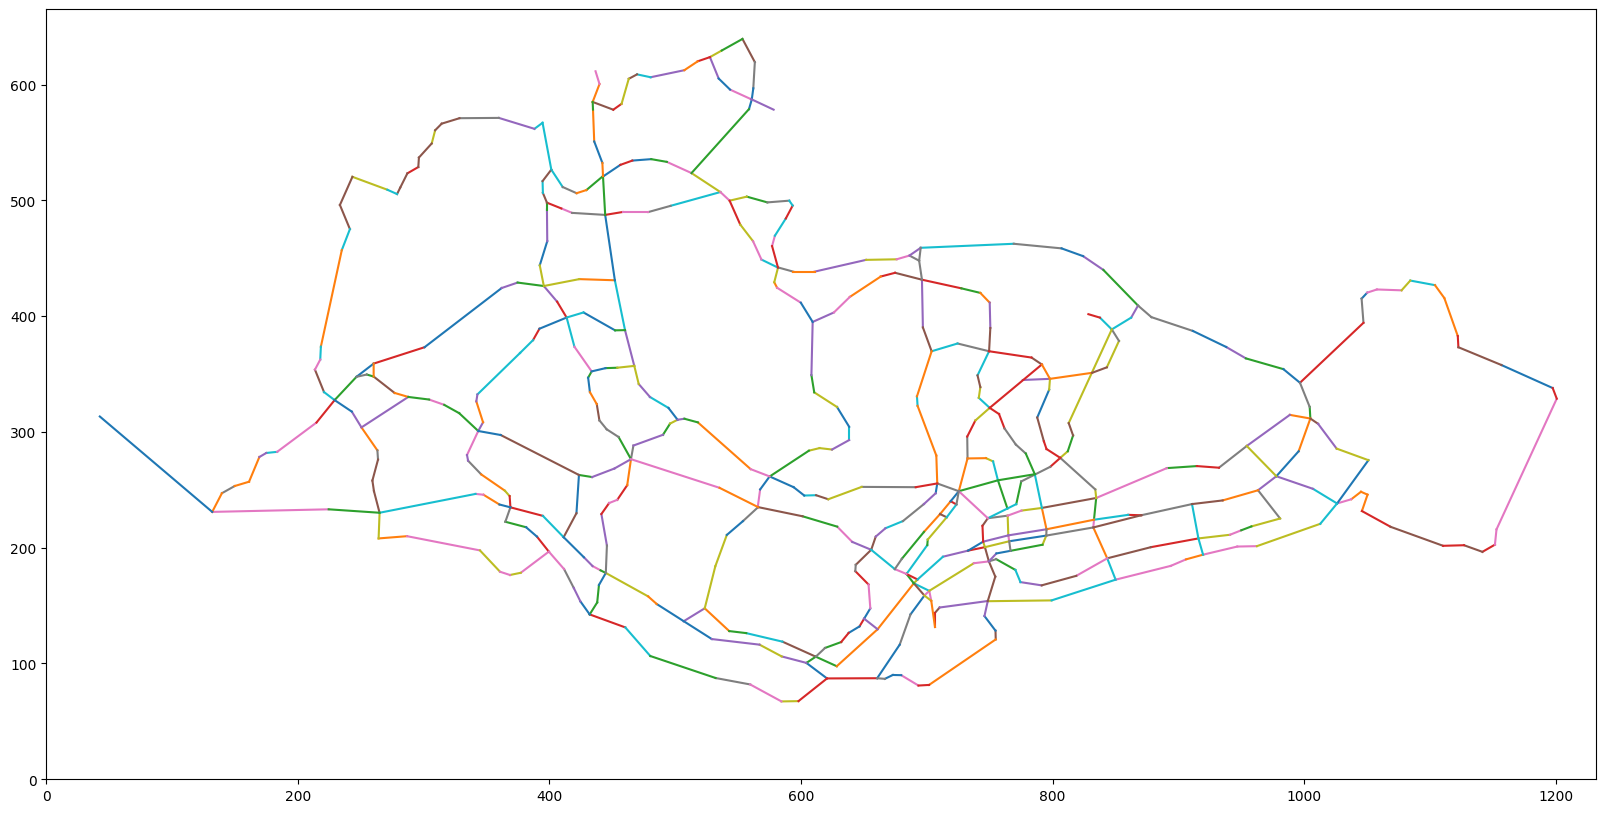

In [2]:
repr = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr.plot_map()

In [5]:
print(repr.edges[0])
print(repr.nodes[0])

Edge from node 444 to node 445
Node 0 at (229.325, 337.534)
